<a href="https://colab.research.google.com/github/PratyushPriyamKuanr271776508/MNIST-Image-Classification-with-Deep-Learning/blob/main/MNIST_Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Setup & Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

## 2. Load & Preprocess the MNIST Dataset

The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9).

In [2]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Reshape the data and add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# One-hot encode labels (e.g., '3' becomes [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
print("Training data shape:", X_train.shape)  # (60000, 28, 28, 1)
print("Test data shape:", X_test.shape)      # (10000, 28, 28, 1)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [7]:
print("Training data shape:", y_train.shape)  # (60000, 10)
print("Test data shape:", y_test.shape)      # (10000, 10)

Training data shape: (60000, 10)
Test data shape: (10000, 10)


## 3. Exploratory Data Analysis (EDA) & Visualizations

### Display Sample Images

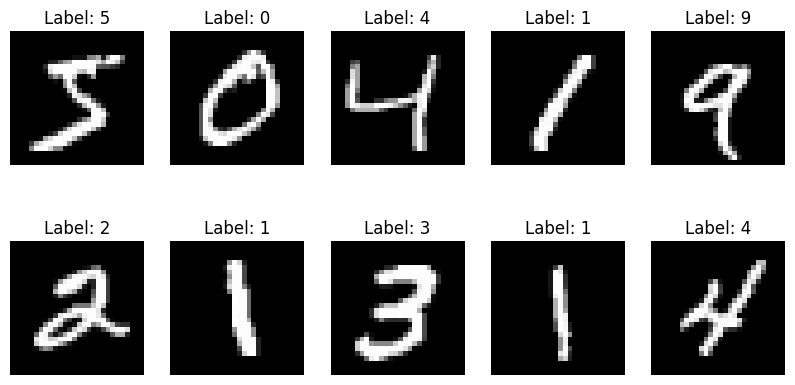

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis('off')

### Check Class Distribution

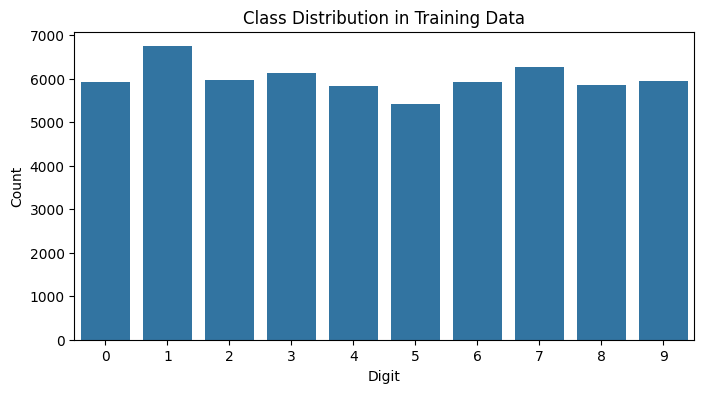

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title("Class Distribution in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

### View the image in more detail

In [10]:
sample_idx = np.random.randint(0, len(X_test))
# Get the image and label
sample_image = X_test[sample_idx]
sample_label = np.argmax(y_test[sample_idx])  # Convert one-hot to integer

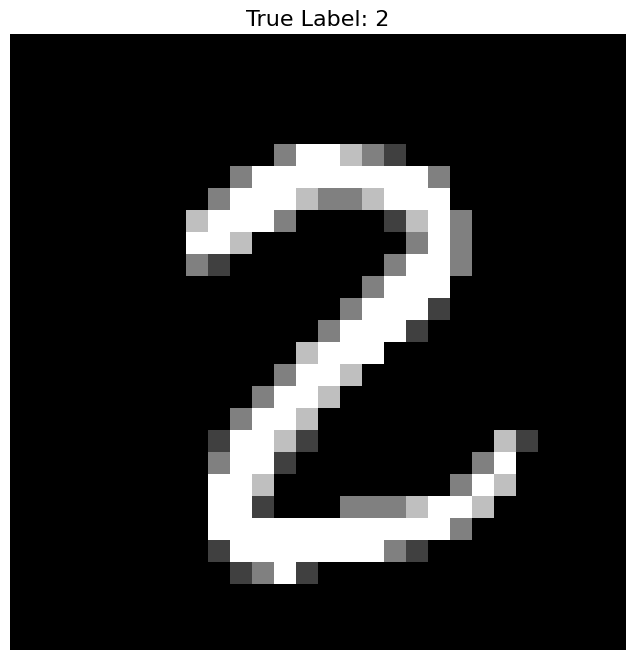

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')  # Reshape to 28x28 (grayscale)
plt.title(f"True Label: {sample_label}", fontsize=16)
plt.axis('off')
plt.show()

In [12]:
print("Raw Pixel Values (28x28 Matrix):")
print(sample_image.reshape(28, 28))  # Reshape and display as a matrix

Raw Pixel Values (28x28 Matrix):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         

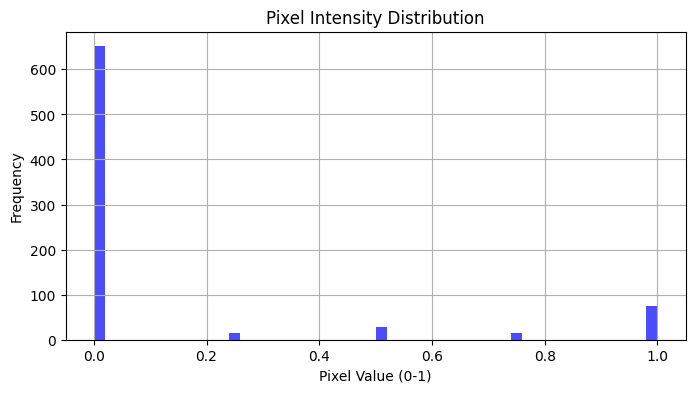

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(sample_image.ravel(), bins=50, color='blue', alpha=0.7)  # Flatten the image
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

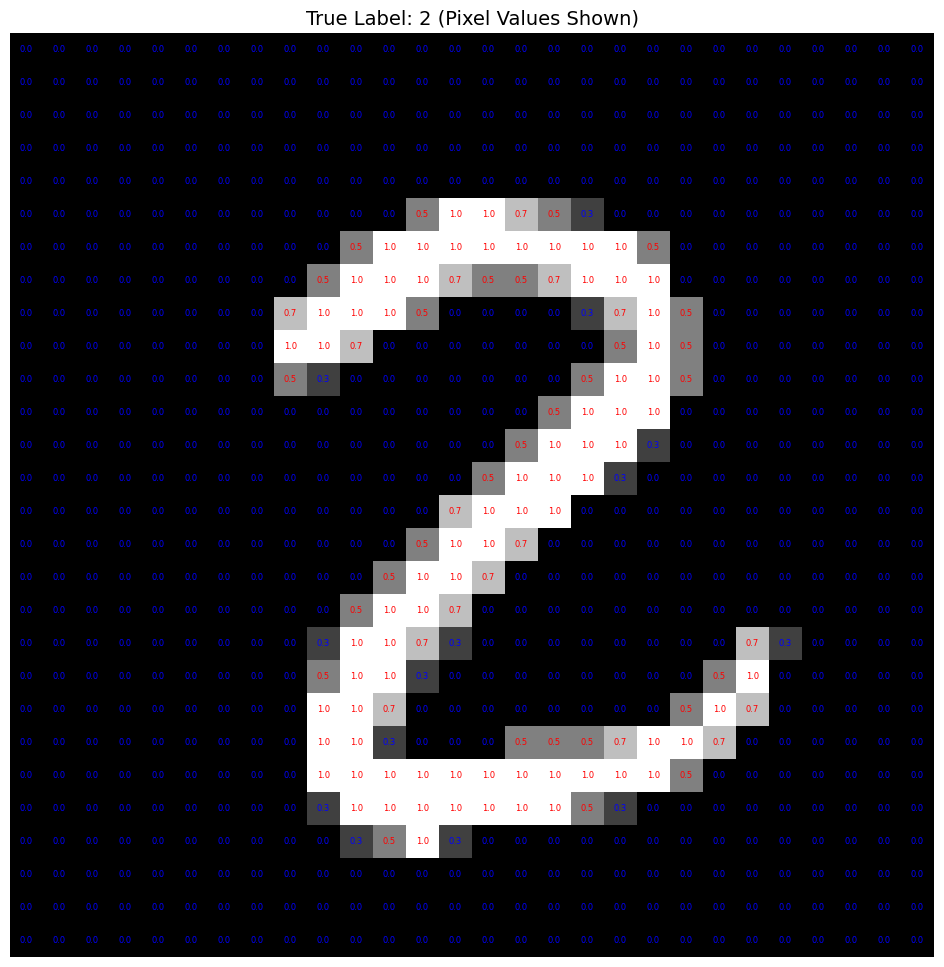

In [14]:
plt.figure(figsize=(12, 12))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')

# Annotate each pixel with its value
for i in range(28):
    for j in range(28):
        val = sample_image.reshape(28, 28)[i, j]
        if val > 0.5:  # Only show text on bright pixels
            plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='red', fontsize=6)
        else:
            plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='blue', fontsize=6)

plt.title(f"True Label: {sample_label} (Pixel Values Shown)", fontsize=14)
plt.axis('off')
plt.show()

## 4. Build the CNN Model

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 4), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 10, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,178 (903.04 KB)

 Trainable params: 231,178 (903.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2) # 20% of training data for validation

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8255 - loss: 0.5473 - val_accuracy: 0.9812 - val_loss: 0.0623
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9694 - loss: 0.1044 - val_accuracy: 0.9875 - val_loss: 0.0440
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9796 - loss: 0.0673 - val_accuracy: 0.9874 - val_loss: 0.0426
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9894 - val_loss: 0.0361
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9866 - loss: 0.0436 - val_accuracy: 0.9900 - val_loss: 0.0367
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9914 - val_loss: 0.0345
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9914 - val_loss: 0.0353
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.9183541536331177,
  0.9735833406448364,
  0.9799583554267883,
  0.9837499856948853,
  0.9869166612625122,
  0.9879583120346069,
  0.9897291660308838,
  0.9908541440963745,
  0.9914791584014893,
  0.9923750162124634],
 'loss': [0.2655499577522278,
  0.09108839929103851,
  0.06472992151975632,
  0.052931610494852066,
  0.0429704487323761,
  0.03843828663229942,
  0.033244986087083817,
  0.028373343870043755,
  0.026434214785695076,
  0.023575831204652786],
 'val_accuracy': [0.981249988079071,
  0.987500011920929,
  0.987416684627533,
  0.9894166588783264,
  0.9900000095367432,
  0.9914166927337646,
  0.9914166927337646,
  0.9907500147819519,
  0.9910833239555359,
  0.9904999732971191],
 'val_loss': [0.06226338818669319,
  0.04402855411171913,
  0.042550940066576004,
  0.03606859967112541,
  0.036716073751449585,
  0.03445656970143318,
  0.03531847521662712,
  0.03845958039164543,
  0.03367970883846283,
  0.04262175410985947]}

### Plot Training History

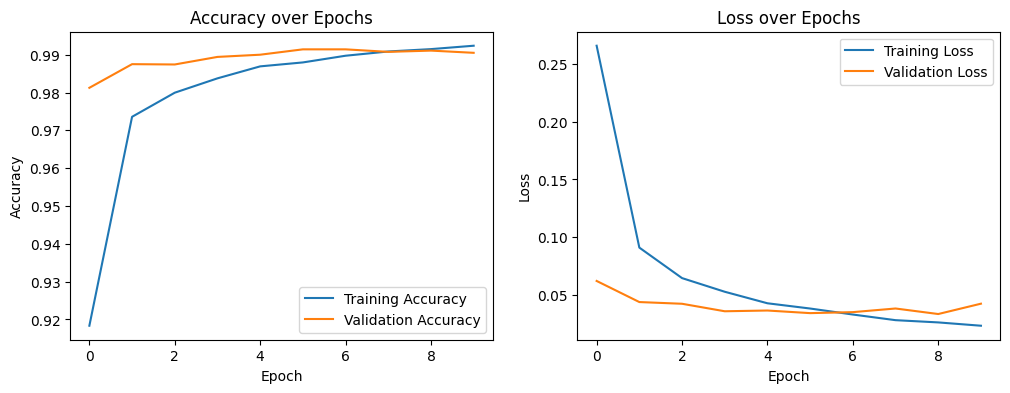

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6. Evaluate the Model on Test Data

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9885 - loss: 0.0410
Test Accuracy: 99.17%


### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


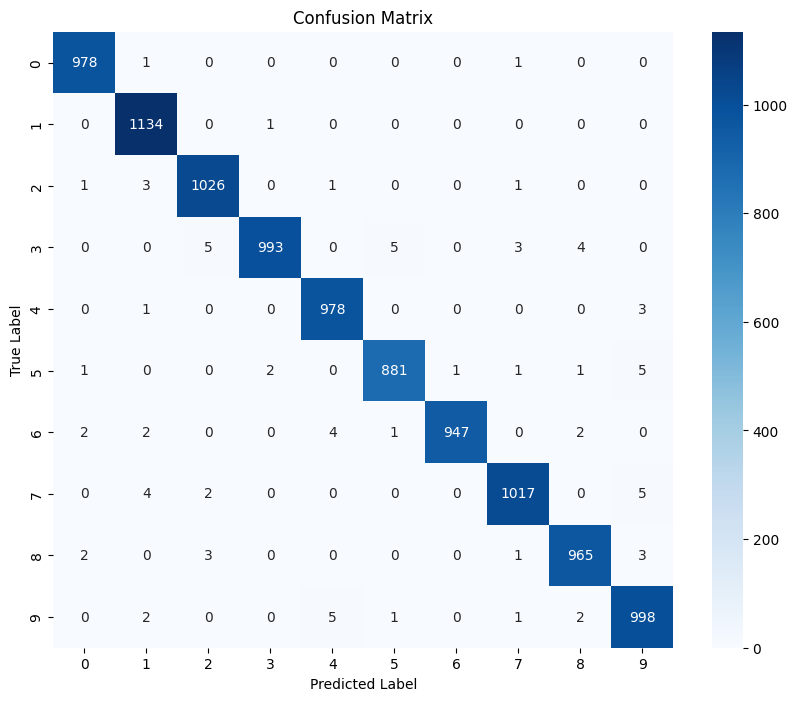

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report

In [22]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## 7. Make Predictions on New Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


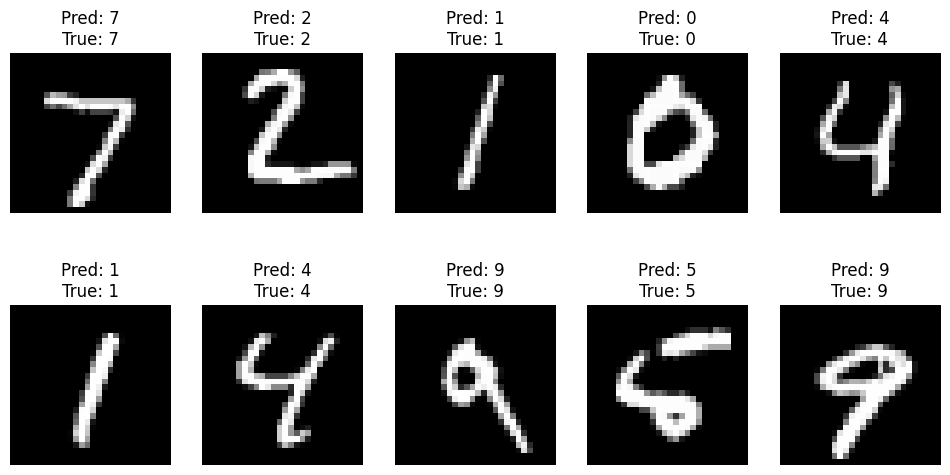

In [23]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred = np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1)))
    true = np.argmax(y_test[i])
    plt.title(f"Pred: {pred}\nTrue: {true}")
    plt.axis('off')
plt.show()